Example with the circle scikit-learn dataset:

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15)]
Levelvector:  [1 4]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 1)
Domain:  [0.0, 0.0] [1.0, 0.125]
Diagonal value:  0.013888888888888892
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Domain:  [0.0, 0.0] [1.0, 0.1875]
Result:  0.0034740708360727433
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
---------------------------------

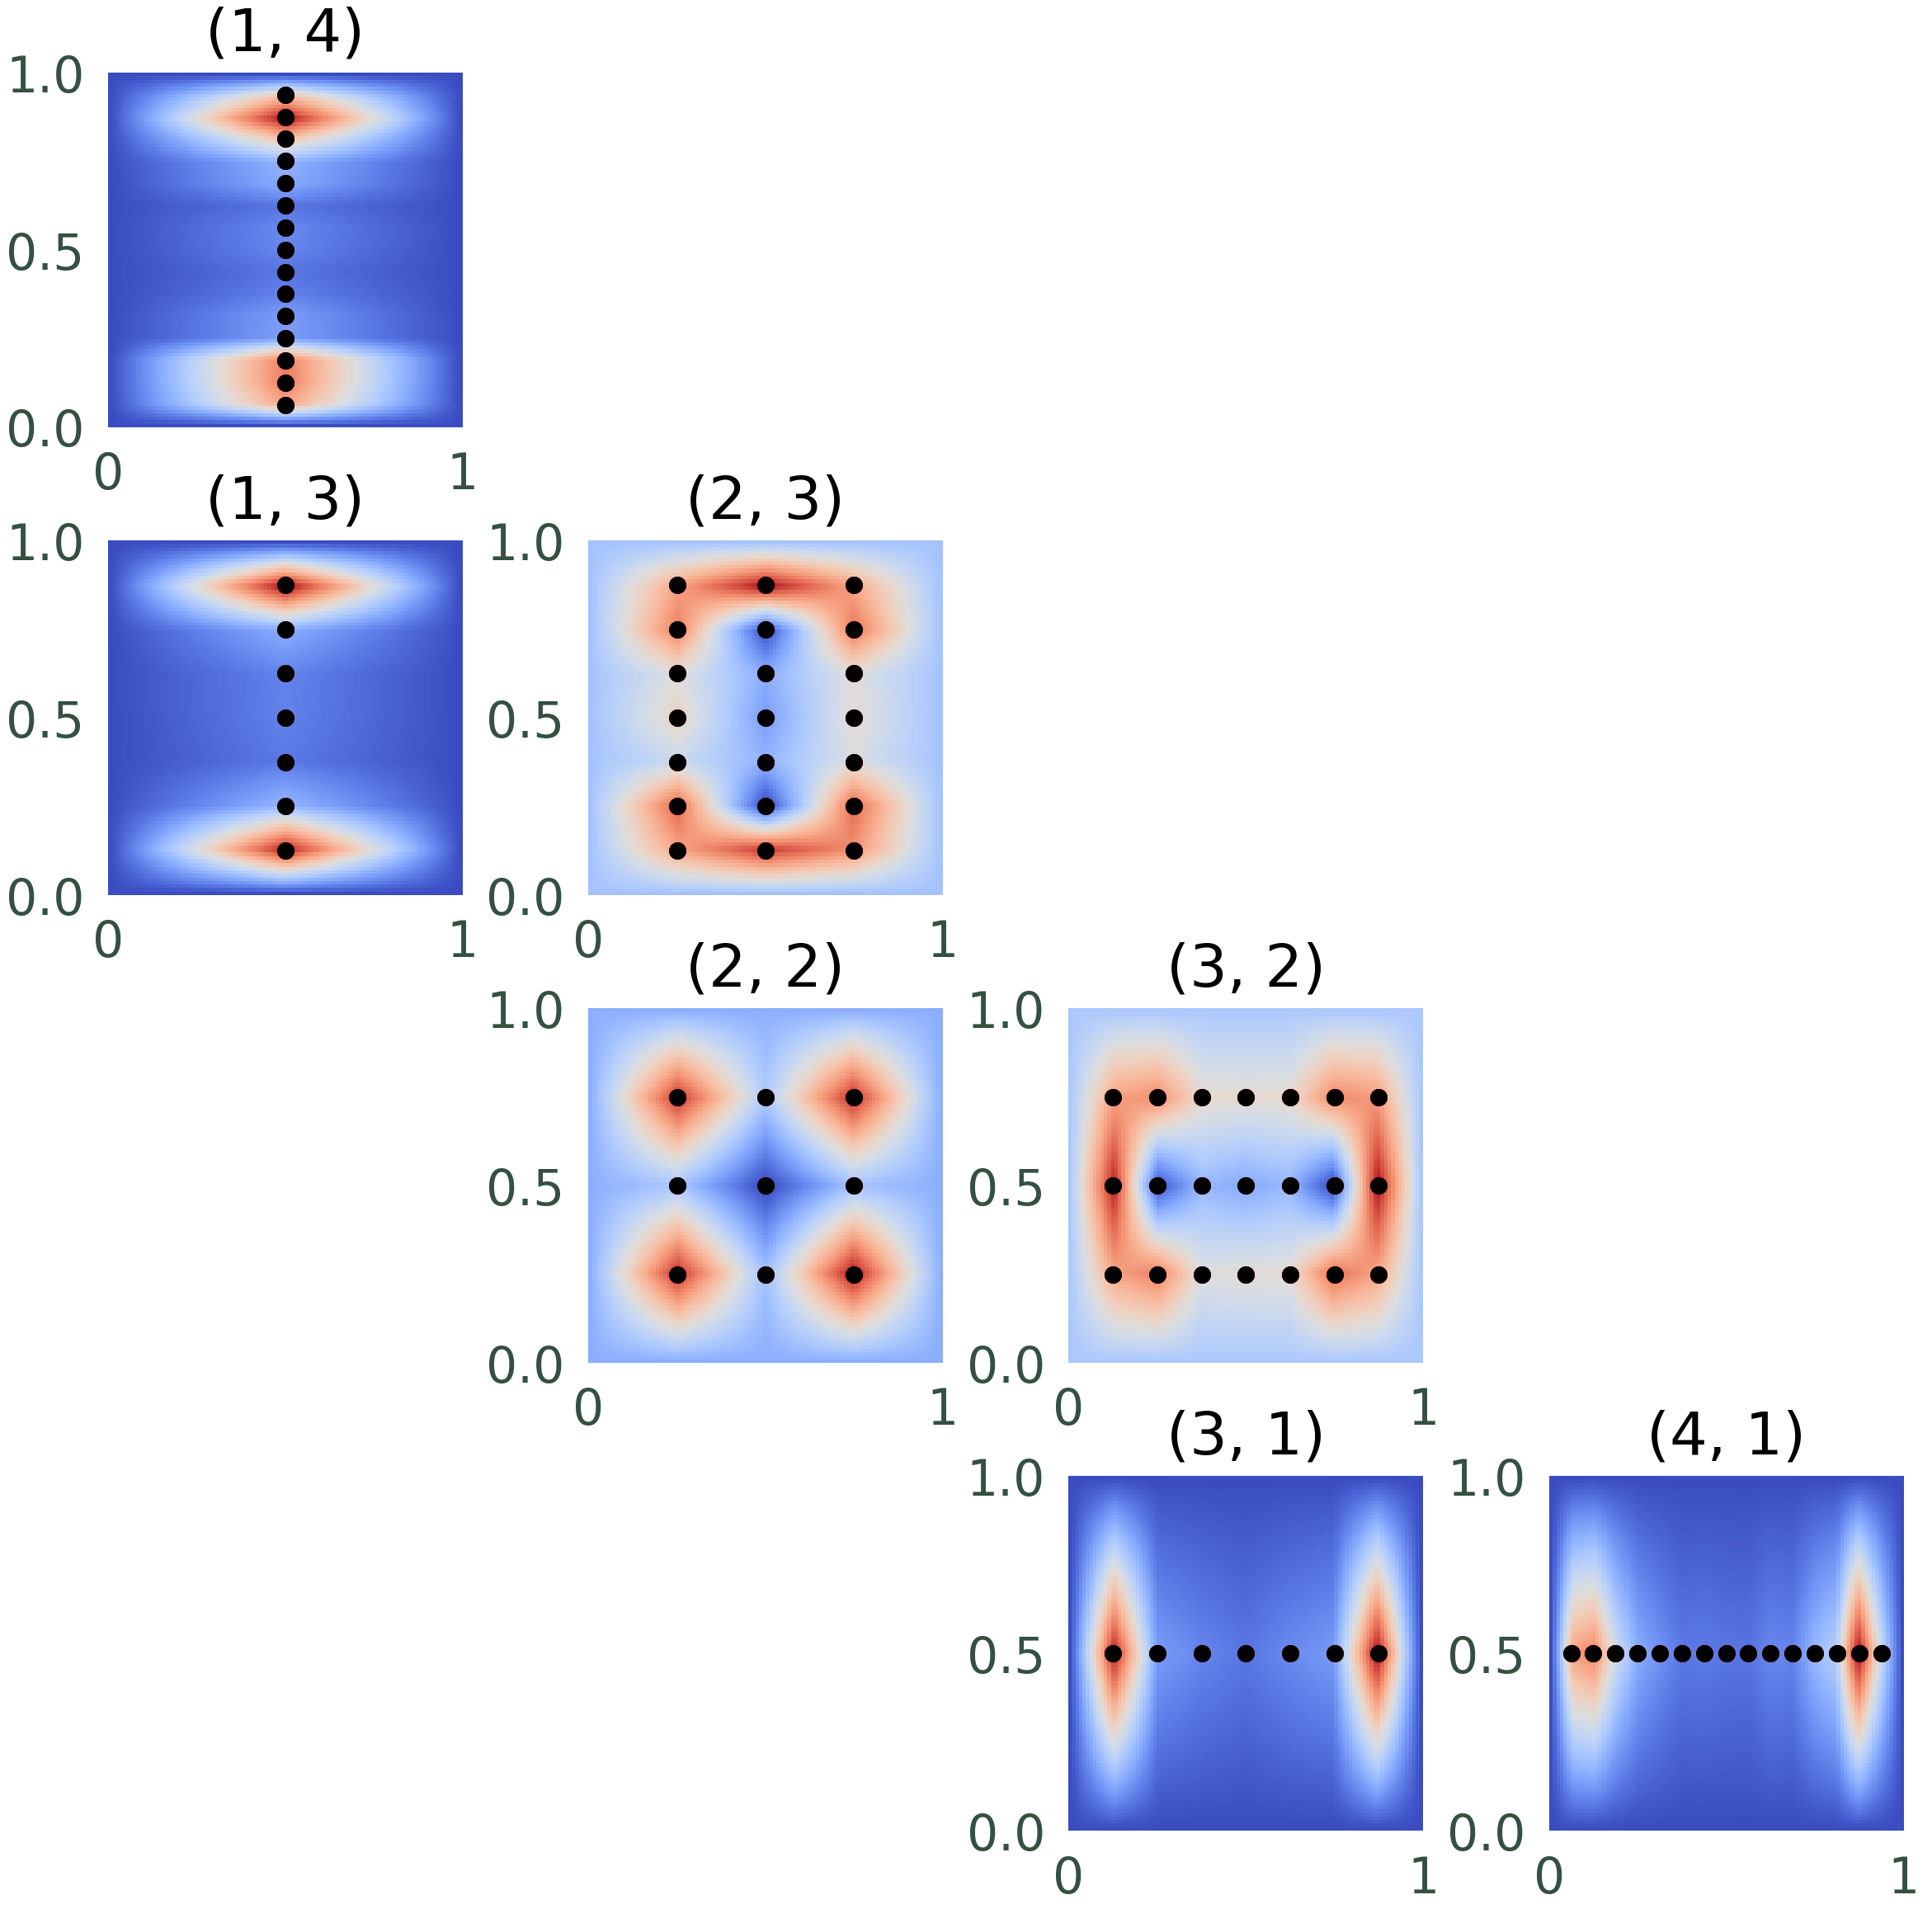

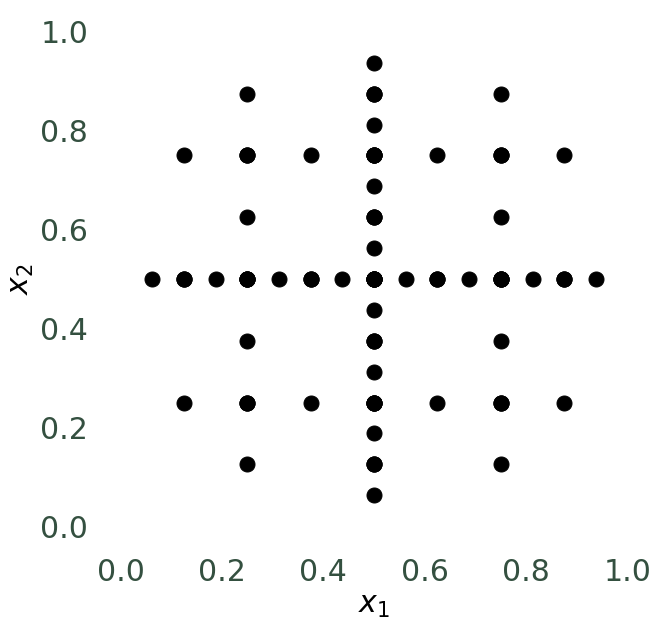

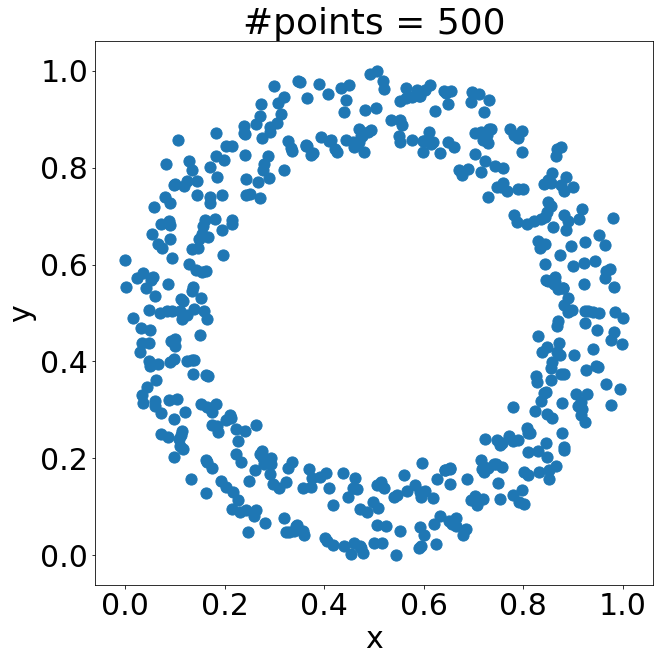

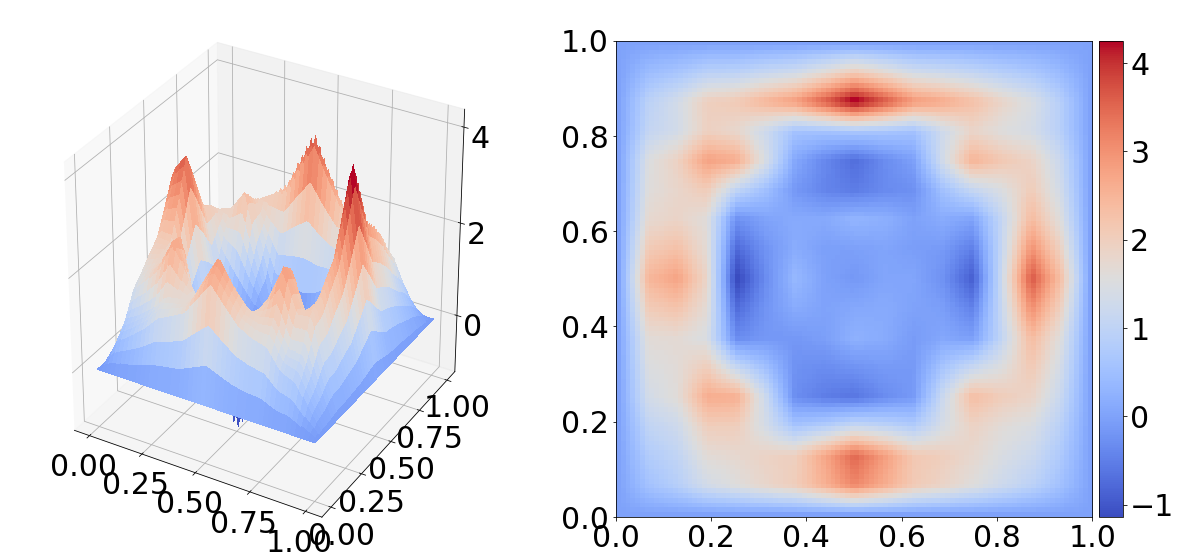

In [1]:
from sys import path
path.append('../src/')
%matplotlib inline
import numpy as np
from ErrorCalculator import *
from GridOperation import *
from StandardCombi import *
from sklearn import datasets

# dimension of the problem
dim = 2

# define the domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define the data
data = datasets.make_circles(500, noise = 0.05)

# initialize the grid operation
operation = DensityEstimation(data, dim)

# initialize the StandardCombi with the DE
combiObject = StandardCombi(a, b, operation=operation)

# define the min and max level of the combi grid
minimum_level = 1
maximum_level = 4

# perform the density estimation operation, has to be done before the printing and plotting
combiObject.perform_operation(minimum_level, maximum_level)
print("Combination Scheme:")
# when you pass the operation the function also plots the contour plot of each component grid
combiObject.print_resulting_combi_scheme(operation=operation)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid(markersize=15)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation:")
# when contour = True, the contour plot is shown next to the 3D plot
combiObject.plot(contour=True)

Example with numpy random sampling:

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15)]
Levelvector:  [1 4]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 1)
Domain:  [0.0, 0.0] [1.0, 0.125]
Diagonal value:  0.013888888888888892
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Domain:  [0.0, 0.0] [1.0, 0.1875]
Result:  0.0034740708360727433
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
---------------------------------

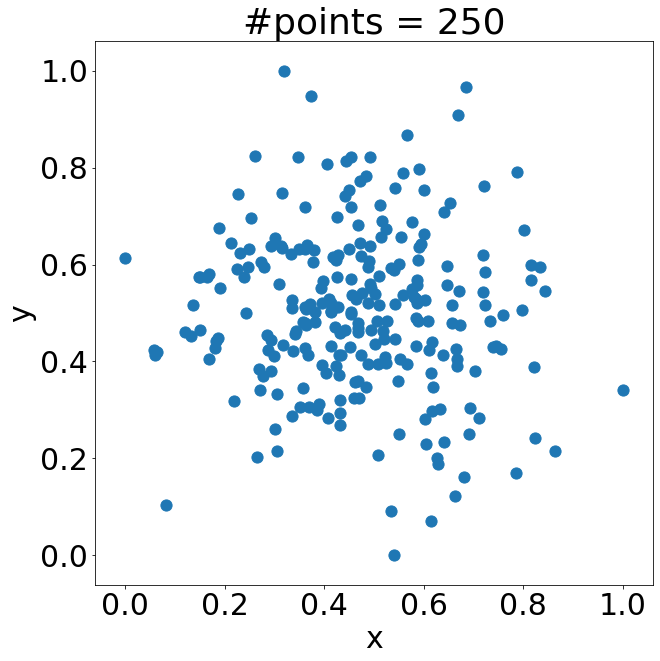

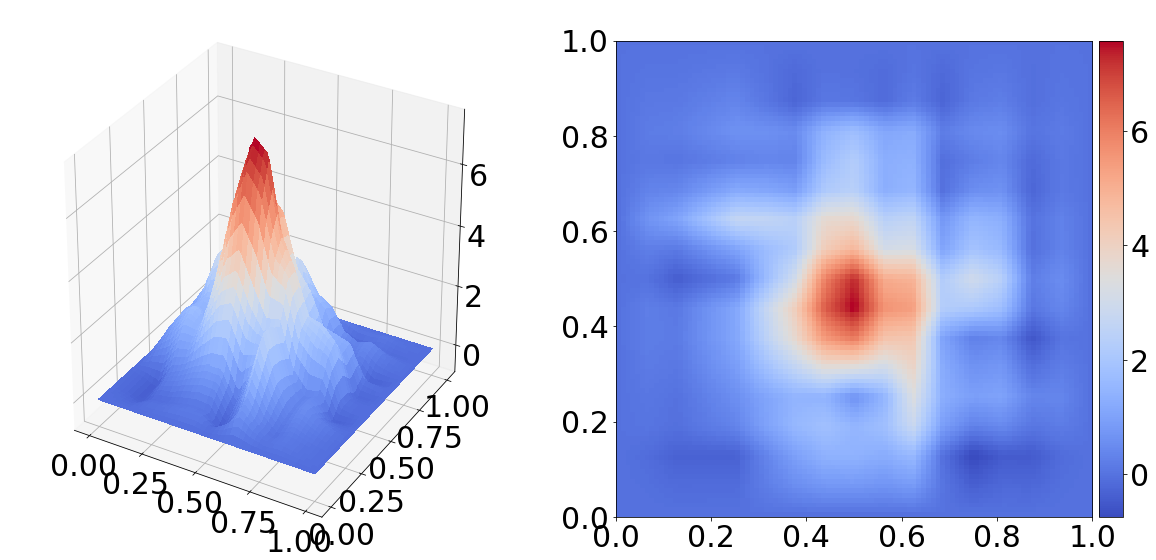

In [2]:
# multivariate normal distribution
mean = [0, 0]
cov = [[1, 0], [0, 100]]
data = np.random.multivariate_normal(mean, cov, 250)
operation.data = data

combiObject.perform_operation(minimum_level, maximum_level)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation")
combiObject.plot(contour=True)

Example with the old faithful geyser dataset:

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15)]
Levelvector:  [1 4]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 1)
Domain:  [0.0, 0.0] [1.0, 0.125]
Diagonal value:  0.013888888888888892
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Domain:  [0.0, 0.0] [1.0, 0.1875]
Result:  0.0034740708360727433
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
---------------------------------

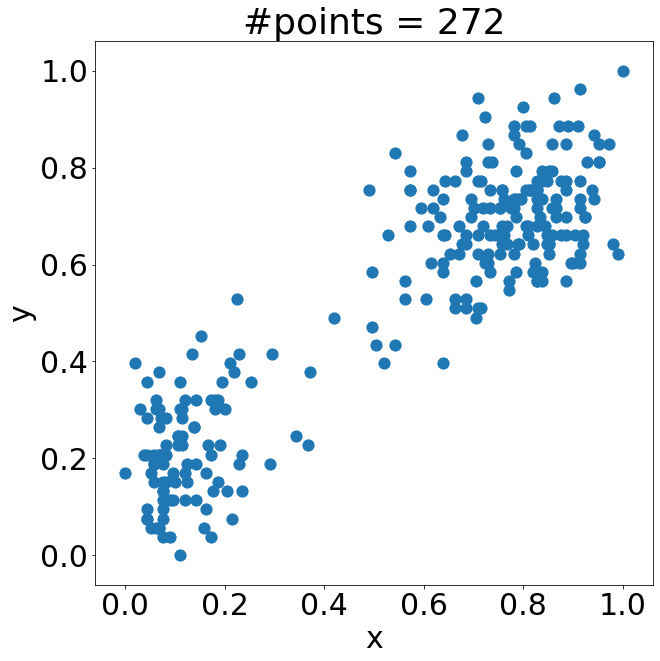

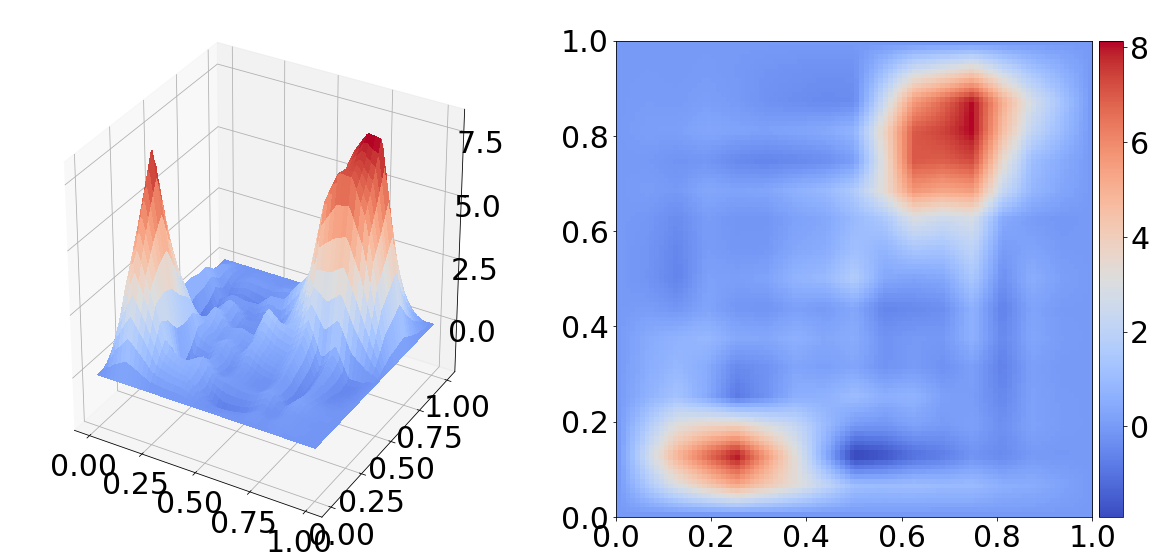

In [3]:
oldFaithfulDataset = "Datasets/faithful.csv"

operation.data = oldFaithfulDataset
combiObject.perform_operation(minimum_level, maximum_level)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation")
combiObject.plot(contour=True)